## Metricas para Clasificadores

- **Indice de Jaccard**: también conocido como el coeficiente de similitud de Jaccard se utiliza para medir la similitud entre el conjunto de elementos reales positivos y el conjunto de elementos predichos como positivos por el modelo.

$$Jaccard(y, \hat{y}) = \frac{\left | y \cap \hat{y} \right |}{\left | y \right | + \left | \hat{y} \right | - \left | y \cap \hat{y} \right |} = \frac{\left | y \cap \hat{y} \right |}{\left | y \cup \hat{y} \right |}$$


- **Matriz de confusión**: La matriz de confusión es una herramienta utilizada principalmente en estadística y machine learning que evalúa la precisión de una clasificación. Dentro de sus ventajas se encuentra la de poder observar en una matriz, los porcentajes de predicciones correctas e incorrectas por clase. La matriz muestra las predicciones correctas y equivocadas, en comparación con los valores reales. 

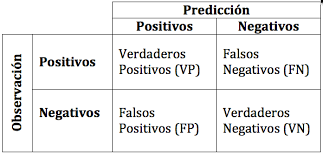


- **Accuracy (Exactitud o Rendimiento)**: Proporciona información sobre el porcentaje de patrones clasificados correctamente. Para clases desbalanceadas es mejor utilizar otra métrica.

$$Accuracy = \frac{VP + VN}{VP + FN + FP + VN}$$

- **Precision**: La precisión mide la habilidad del clasificador para no predecir un caso negativo como un caso positivo.

$$Precision = \frac{VP }{VP + FP}$$

- **Recall (Sensibilidad o  Exhaustividad)**: Es la habilidad del clasificador para predecir casos positivos como positivos. Esta métrica se suele utilizar en el ámbito médico debido a que da prioridad a predicción o clasificación de pacientes enfermos como enfermos sin dar el mismo nivel de importancia si un paciente sano se clasifica como enfermo.

$$Recall = \frac{VP}{VP + FN}$$


- **Specificity (Especificidad)**: Muestra la habilidad del clasificador para predecir verdaderos negativos reales correctamente. 

$$ Specificity = \frac{VN}{VN + FP}$$


- **F1-Score**: Es la media armónica entre la precisión y la sensibilidad. Es especialmente útil en casos donde existe desbalance de clases.

$$F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$


- **Curva ROC (Receiver Operating Characteristics/Característica Operativa del Receptor)**:

    Es la representación de la proporción de verdaderos positivos frente a la proporción de falsos positivos.
    
    Es una curva que se grafica a través de los siguientes ejes: 
    - **Eje Y**: Recall.
    - **Eje X**: 1 - Specificity.
    
 Se construye trazando la **Sensibilidad** contra **1 - Especifidad** para diferentes umbrales de decisión en un problema de clasificación binaria.
    
    
- **Area Under the Curve ROC (AUC-ROC)**: Utilizada para cuantificar la calidad del rendimiento de un modelo de clasificación binaria a través de su curva ROC. El valor de AUC-ROC esta acotado en 0 y 1. Representa la capacidad del modelo para distinguir entre clases **True** o **False**. También es útil cuando existe desbalance de clases.

$$
Sensibilidad_{i} = \frac{\left|TP_{i} \right|}{\left| P \right|} = \frac{\sum_{j=1}^{i}y_{j}}{\sum_{j=1}^{n}y_{j}}
$$

$$
Especificidad_{i} = \frac{\left|TN_{i} \right|}{\left| N \right|} = \frac{\sum_{j=1}^{i}(1-y_{j})}{\sum_{j=1}^{n}(1-y_{j})}
$$

$$
ROC-AUC = \sum_{i = 1}^{n-1}(Sensibilidad_{i} *\Delta Especificidad_{i})
$$

Donde: 
$
\Delta Especificidad_{i} = Especificidad_{i + 1} - Especificidad_{i}
$

In [1]:
import numpy as np

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt

import sklearn # Para ver la versión
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==2.0.2
matplotlib==3.10.0
scikit-learn==1.6.1


In [3]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

### Tran Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Train: {X_test.shape}, {y_test.shape}")

Train: (105, 4), (105,)
Train: (45, 4), (45,)


### Escalado

In [5]:
X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

### Modelo

In [6]:
clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0,
       0])

## Métricas

In [7]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.9505494505494506
Accuracy: 0.9777777777777777
Precisión: 0.9761904761904763
Sensibilidad: 0.9743589743589745
F1-score: 0.974320987654321


### Matriz de confusion

In [8]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

### Classification Report

In [9]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      0.929     1.000     0.963        13
           2      1.000     0.923     0.960        13

    accuracy                          0.978        45
   macro avg      0.976     0.974     0.974        45
weighted avg      0.979     0.978     0.978        45



### Curva ROC

Una curva ROC es un gráfico que resume el rendimiento de un modelo de clasificación binaria en la clase positiva.

**Solo para clasificación binaria.**

In [10]:
# Hago el dataset binario

X_train, X_test, y_train, y_test = train_test_split(X[50:, :], y[:100], test_size = 0.3, random_state = 42)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Train: {X_test.shape}, {y_test.shape}")

Train: (70, 4), (70,)
Train: (30, 4), (30,)


In [11]:
# Entreno el modelo

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

Area bajo la curva: 0.918552036199095


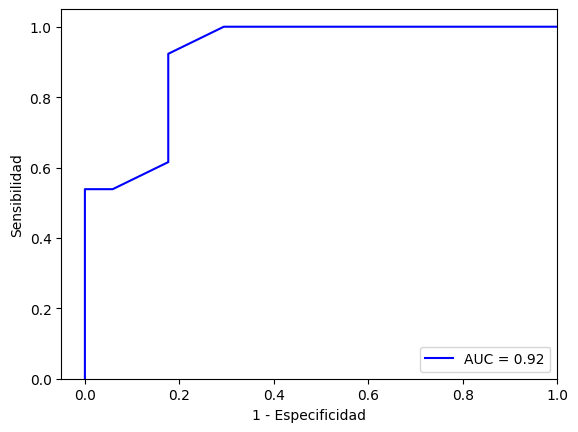

In [12]:
# ROC Plot

probs = clf.predict_proba(X_test)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print("Area bajo la curva:", auc(fpr, tpr))

plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)

plt.xlim([-0.05, 1])
plt.ylim([0, 1.05])

plt.ylabel("Sensibilidad")
plt.xlabel("1 - Especificidad")

plt.legend()

plt.show()

### ROC AUC (Receiver Operating Characteristics Area Under the Curve)

Este área puede interpretarse como la probabilidad de que ante un par de instancias, uno Positivo y uno Negativo, la prueba los clasifique correctamente.

In [13]:
print("ROC AUC:", roc_auc_score(y_test, yhat))

ROC AUC: 0.7398190045248867


$$\begin{equation}
\text{AUC-ROC} = \int_0^1 \text{Tasa de Verdaderos Positivos} \, d(\text{Tasa de Falsos Positivos})
\end{equation}$$


$$
\text{AUC-ROC} = \sum_{i=1}^{n} \left( \text{Tasa de Verdaderos Positivos}_i \times \Delta \text{Tasa de Falsos Positivos}_i \right)
$$

In [14]:
################################################################################################################################